## Joe Garcia
## DATA 608 Knowledge and Visual Analytics
## Feb 4 2024
## Prof: Peter Kowalchuk

# Introduction

The attached Excel file contains data on the present allocation of the Infrastructure Investment and Jobs Act funding by State and Territory.
Your story (Data Visualization(s) ) should address the following questions:
Is the allocation equitable based on the population of each of the States and Territories, or is bias apparent?

Does the allocation favor the political interests of the Biden administration?
Notes:
You will need to source data on the current (estimated) population of each of the States and Territories (accuracy is more important than precision) and on the official election results of the 2020 Presidential election.

You may choose to develop you visualizations using a desktop application or a code library. Your submittal should be in the form of a report (document) or a presentation.

This assignment is due by the end of week two of the semester.

# Questions

Is the allocation (from the Jobs Act) equitable based on the population of each of the States and Territories, oris bias apparent?

Does the allocation favor the political interests of the Biden administration?

# Data Used

We will be using the data from class which is an excel sheet containing Funding as of March 2023 of the Jobs Act. We also have the population of the 50 states in 2023 with the American Census.

https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html#v2023

The Northern Mariana Islands Population in 2023 with World Population Review:

https://worldpopulationreview.com/countries/northern-mariana-islands-population

For Guam, Virgin Islands, and the American Samoa for the year 2021:

https://datatopics.worldbank.org/world-development-indicators/

The Indigenous world 2023, gave us an estimated 8 million for the Tribal Communities:

https://www.iwgia.org/en/usa/5188-iw-2023-usa.html#:~:text=The%20number%20of%20Indigenous%20people,areas%20or%20Alaska%20Native%20villages.

Finally, we have the 2020 Presidential voting outcome, from wikipedia:

https://en.wikipedia.org/wiki/2020_United_States_presidential_election#Results_by_state



# Preparing Data

We must import our data, I went ahead and added the 6 Territories not found in the census manullly but we still have to add the census. We added the population estimates to them already. So next we have to import necessary python libraries in order to have the appropiate  data cleaning tools.


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

jobs_funding = pd.read_csv("/Users/joe/Downloads/IIJA_FUNDING_AS_OF_MARCH_2023_edited.csv")

us_population = pd.read_csv("/Users/joe/Downloads/NST-EST2023-POP.csv")

jobs_funding.head()


,"State, Teritory or Tribal Nation",Total (Billions),Population,Unnamed: 3
0,ALABAMA,3.0000,NaN,No
1,ALASKA,3.7000,NaN,No
2,AMERICAN SAMOA,0.0686,45035,NaN
3,ARIZONA,3.5000,NaN,Biden
4,ARKANSAS,2.8000,NaN,No


## Getting rid of Columns and Rows

Here I am finding the exact column names inorder to rename them



In [63]:
jobs_funding.columns

jobs_funding = jobs_funding.rename(columns = {"State, Teritory or Tribal Nation" : "state", 'Population':"pop",'Unnamed: 3': 'Election'})
jobs_funding.head()



,state,Total (Billions),pop,Election
0,ALABAMA,3.0000,NaN,No
1,ALASKA,3.7000,NaN,No
2,AMERICAN SAMOA,0.0686,45035,NaN
3,ARIZONA,3.5000,NaN,Biden
4,ARKANSAS,2.8000,NaN,No


# I dropped the census Estimated Base, 2020, 2021,and 2022 columns, we won't be using them. We are primarily focused on 2023. Also, we drop the rows that feature anything else such as Northwest, Midwest, South, and West as well as miscellaneous information that we don't need.



In [64]:
us_pop_edited = us_population.drop(columns = ["Unnamed: 1","Unnamed: 2","Unnamed: 3","Unnamed: 4"])

us_pop_states = us_pop_edited.iloc[8:59]
us_pop_states.head()

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 5
8,.Alabama,"5,108,468"
9,.Alaska,"733,406"
10,.Arizona,"7,431,344"
11,.Arkansas,"3,067,732"
12,.California,"38,965,193"


In [65]:
us_pop_states.columns

Index(['table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)', 'Unnamed: 5'], dtype='object')

# Renaming the column names

In [66]:
us_pop_states_edited = us_pop_states.rename(columns = {"table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)" : "state", 'Unnamed: 5':"pop"})

us_pop_states_edited.head()


,state,pop
8,.Alabama,"5,108,468"
9,.Alaska,"733,406"
10,.Arizona,"7,431,344"
11,.Arkansas,"3,067,732"
12,.California,"38,965,193"


# Here we drop the '.' from the first name of the states.


In [67]:
# drop the . from the state names
us_pop_states_edited['state'] = us_pop_states_edited["state"].str.replace('.','')

# drop the commas from the numbers
us_pop_states_edited['pop']= us_pop_states_edited["pop"].str.replace(',','')
jobs_funding['pop']= jobs_funding["pop"].str.replace(',','')

# make the pop column integers
us_pop_states_edited['pop'] = us_pop_states_edited["pop"].astype(int)



/var/folders/xf/zcm0s5yn7gq0z85v9mzjpg0m0000gp/T/ipykernel_38605/2513838766.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  us_pop_states_edited['state'] = us_pop_states_edited["state"].str.replace('.','')


In [68]:
us_pop_states_edited.head()

,state,pop
8,Alabama,5108468
9,Alaska,733406
10,Arizona,7431344
11,Arkansas,3067732
12,California,38965193


In [69]:
jobs_funding.head()

,state,Total (Billions),pop,Election
0,ALABAMA,3.0000,NaN,No
1,ALASKA,3.7000,NaN,No
2,AMERICAN SAMOA,0.0686,45035,NaN
3,ARIZONA,3.5000,NaN,Biden
4,ARKANSAS,2.8000,NaN,No


In [70]:
us_pop_states_edited.state = us_pop_states_edited.state.str.title()

us_pop_states_edited.head()


,state,pop
8,Alabama,5108468
9,Alaska,733406
10,Arizona,7431344
11,Arkansas,3067732
12,California,38965193


In [71]:
jobs_funding.state = jobs_funding.state.str.title()

# Dropping the Territories

Deciding whether to include the territories came up relatively soon. I had just gathered all the necessary data to describe them, except for the presidential vote. I understand that the territories are part of the US, but they don't get to vote in the Electoral College. While I had collected this information for the assignment, I decided to exclude them from the final analysis to determine whether they affect President Biden's overall administration.


## Fixing an error in Excel document
This was an error found in the excel document with the name of one state.



In [72]:
jobs_funding.rename({'Deleware': 'Delaware'}).head()

,state,Total (Billions),pop,Election
0,Alabama,3.0000,NaN,No
1,Alaska,3.7000,NaN,No
2,American Samoa,0.0686,45035,NaN
3,Arizona,3.5000,NaN,Biden
4,Arkansas,2.8000,NaN,No


In [73]:
final_jobs = jobs_funding.merge(us_pop_states_edited,how='right', left_on='state', right_on='state')

final_jobs.head()
# final_jobs

,state,Total (Billions),pop_x,Election,pop_y
0,Alabama,3.0,NaN,No,5108468
1,Alaska,3.7,NaN,No,733406
2,Arizona,3.5,NaN,Biden,7431344
3,Arkansas,2.8,NaN,No,3067732
4,California,18.4,NaN,Biden,38965193


In [74]:
final_jobs.columns


Index(['state', 'Total (Billions)', 'pop_x', 'Election', 'pop_y'], dtype='object')

In [75]:
vals = {"No": "Trump", "Biden":"Biden"}

final_jobs["Election"] = final_jobs["Election"].map(vals)

In [76]:
final_jobs = final_jobs.drop(final_jobs.columns[2], axis=1)

final_jobs.head()


,state,Total (Billions),Election,pop_y
0,Alabama,3.0,Trump,5108468
1,Alaska,3.7,Trump,733406
2,Arizona,3.5,Biden,7431344
3,Arkansas,2.8,Trump,3067732
4,California,18.4,Biden,38965193


# Here I managed to get the total Billions divided by the population

In [77]:
final_jobs['price/citizen'] = final_jobs['Total (Billions)'].map(lambda x: x*1000000000)/final_jobs['pop_y']


In [78]:
Biden_won = final_jobs[final_jobs["Election"] == "Biden"]
Trump_won = final_jobs[final_jobs["Election"] == "Trump"]


In [79]:
Trump_won.sort_values(by='price/citizen',ascending=False).head()

,state,Total (Billions),Election,pop_y,price/citizen
1,Alaska,3.7,Trump,733406,5044.954636
50,Wyoming,2.3,Trump,584057,3937.971808
26,Montana,3.3,Trump,1132812,2913.104734
34,North Dakota,1.8,Trump,783926,2296.135094
41,South Dakota,1.3,Trump,919318,1414.091751


# Visual Analytics

# I conducted a visual analysis with a pair of data representing the finances of the state. Visually, you might sense a bias; however, after running it through some tests, we can see that there is no bias.


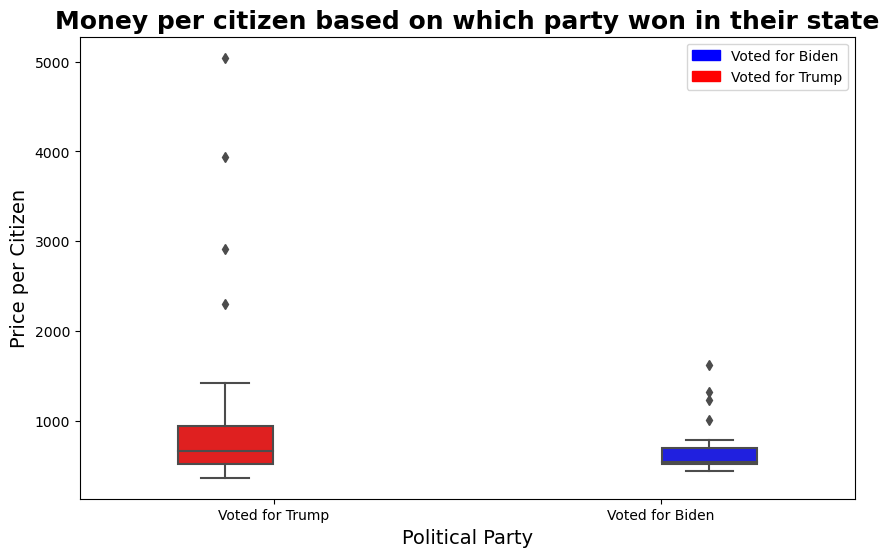

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6))
sns.boxplot(x='Election', y='price/citizen', data=final_jobs, hue='Election', palette={'Biden': 'BLUE', 'Trump': 'RED'}, width=0.5, dodge=True)

plt.title('Money per citizen based on which party won in their state', fontsize=18, fontweight='bold')
plt.xlabel('Political Party', fontsize=14)
plt.ylabel('Price per Citizen', fontsize=14)

#plt.legend(labels=['Voted for Biden', 'Voted for Trump'])
plt.xticks(ticks=[0, 1], labels=['Voted for Trump', 'Voted for Biden'])

blue_patch = mpatches.Patch(color='blue', label='Voted for Biden')
red_patch = mpatches.Patch(color='red', label='Voted for Trump')


# Add custom legend
plt.legend(handles=[blue_patch, red_patch])


plt.show()



In [81]:
states_money = final_jobs.sort_values('price/citizen')

states = states_money['state']
funds = states_money['price/citizen']



# It does not appear to be equitable based on the size of the population. The number 1 state is Alaska, not at all high in population, while California is near the bottom of the list. New York is also near the bottom of the list.

In [83]:
# colors = []
# for won in states_money['Election']:
#     if won=='Biden':
#         colors.append('blue')  # Biden won
#     else:
#         colors.append('red')   # Trump won

# plt.figure(figsize=(10, 6))


# sns.barplot(x='price/citizen', y='state', data=states_money, palette=colors)

# plt.xlabel('Funds', fontsize=20)
# plt.ylabel('States', fontsize=20)
# plt.title('Political Party and the amount of funds per Person', fontsize=16, fontweight='bold')


# plt.yticks(rotation=0)
# plt.tick_params(axis='y', labelsize=8)


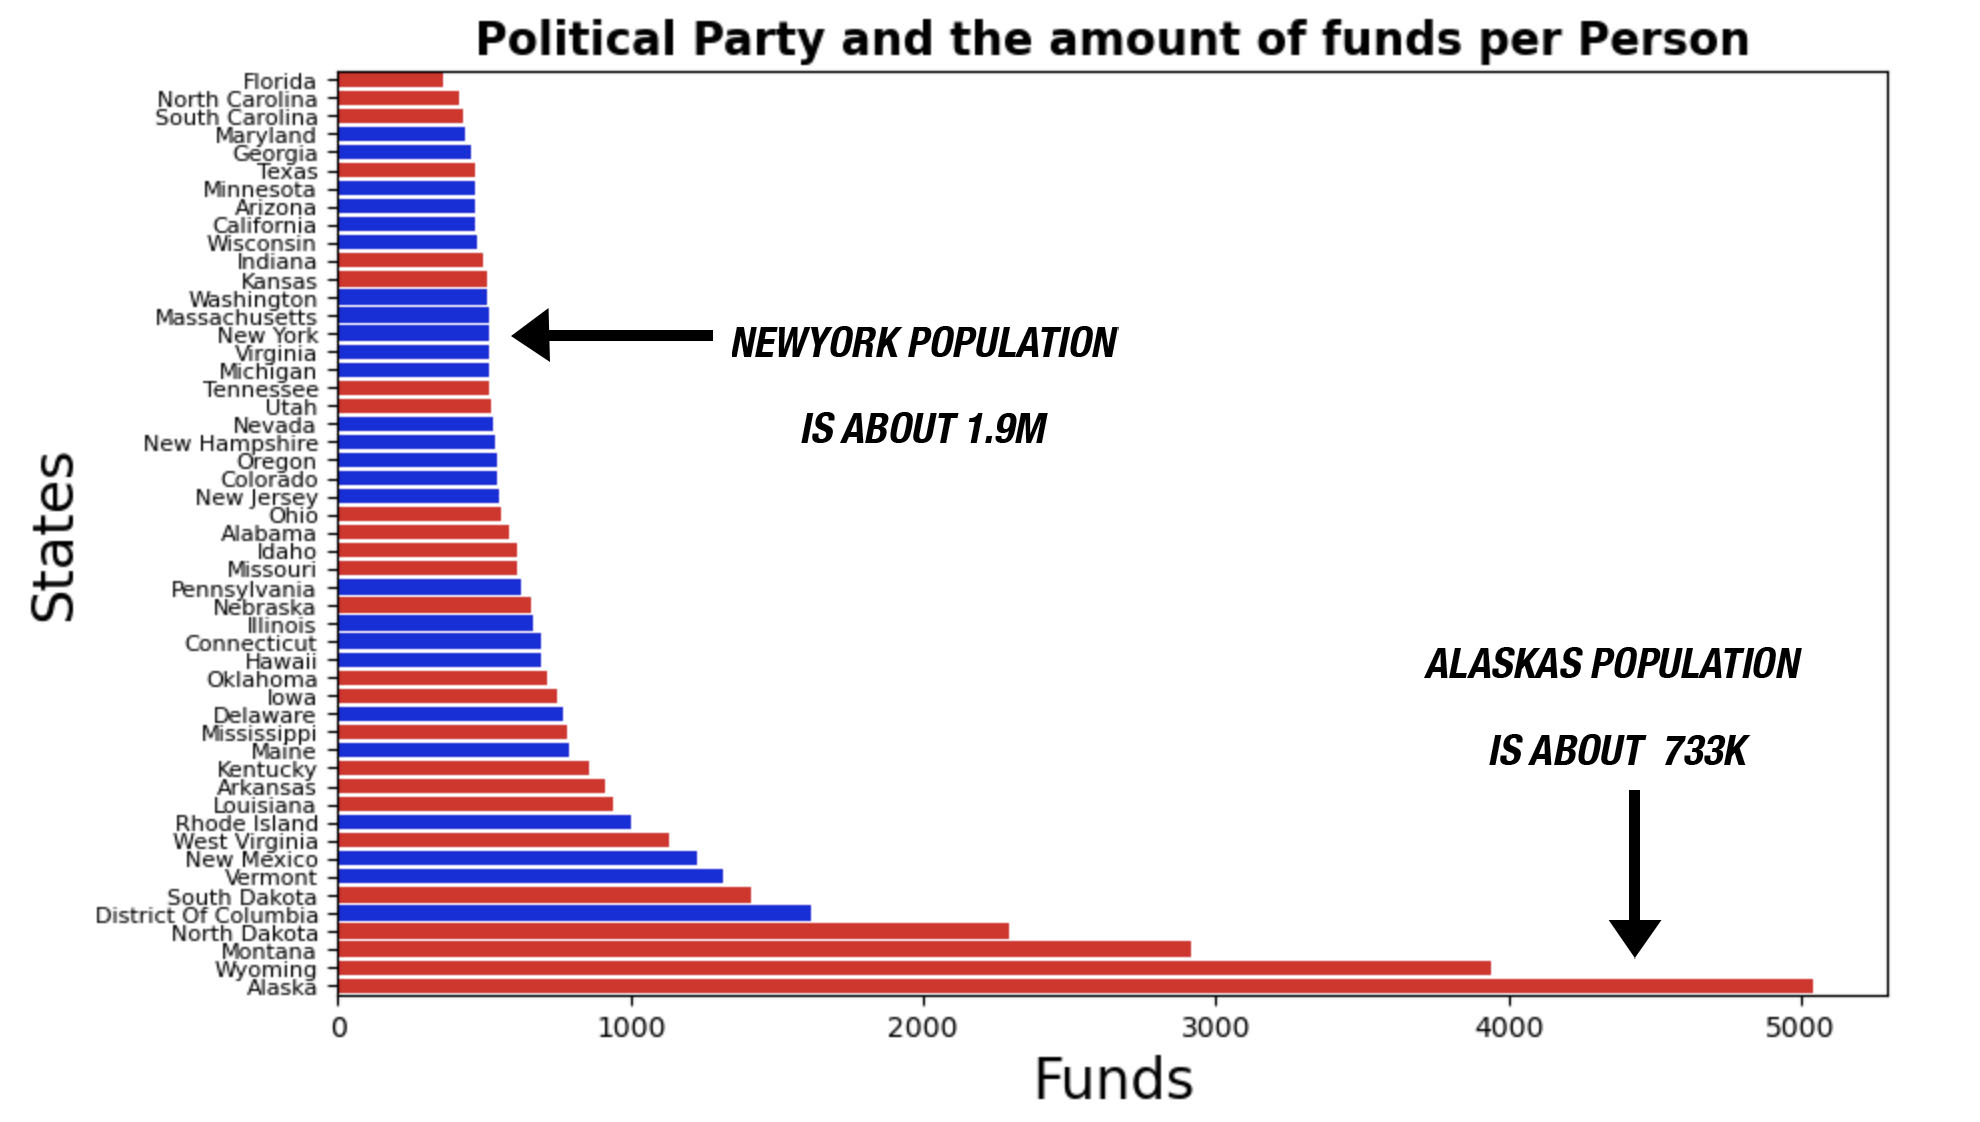

# We can see here that although there is a slight bias with a p-value of 0.056, it does not fall within the range to be a statistically significant value. It's very close, and perhaps that's what we observe in the box-whisker plot, but not quite.



In [92]:
Biden_won.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 2 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             26 non-null     object 
 1   Total (Billions)  26 non-null     float64
 2   Election          26 non-null     object 
 3   pop_y             26 non-null     int64  
 4   price/citizen     26 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ KB


In [91]:
Trump_won.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 50
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             25 non-null     object 
 1   Total (Billions)  25 non-null     float64
 2   Election          25 non-null     object 
 3   pop_y             25 non-null     int64  
 4   price/citizen     25 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ KB


In [98]:
Biden_price=Biden_won['price/citizen']
Trump_price=Trump_won['price/citizen']

In [101]:
t_stat, p_value = stats.ttest_ind(Trump_price, Biden_price)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('The difference is statistically significant (reject the null hypothesis)')
else:
    print('The difference is not statistically significant (fail to reject the null hypothesis)')



T-statistic: 1.9524880677784409
P-value: 0.056605530585403616
The difference is not statistically significant (fail to reject the null hypothesis)


# Here, we can see that there is a significant gap in the money allocated to the top 5 states, with a large portion going to states that did not vote for Biden. However, it's not a significant point of interest, as the bottom 5 states also demonstrate a similar pattern, with 3 of them not voting for Biden.

In [88]:
final_sorted = final_jobs.sort_values(by='price/citizen',ascending=False)
final_sorted.head(5)



,state,Total (Billions),Election,pop_y,price/citizen
1,Alaska,3.7,Trump,733406,5044.954636
50,Wyoming,2.3,Trump,584057,3937.971808
26,Montana,3.3,Trump,1132812,2913.104734
34,North Dakota,1.8,Trump,783926,2296.135094
8,District Of Columbia,1.1,Biden,678972,1620.096263


In [89]:

final_sorted.tail(5)

,state,Total (Billions),Election,pop_y,price/citizen
10,Georgia,5.0,Biden,11029227,453.340928
20,Maryland,2.7,Biden,6180253,436.875319
40,South Carolina,2.3,Trump,5373555,428.022045
33,North Carolina,4.5,Trump,10835491,415.301900
9,Florida,8.2,Trump,22610726,362.659739


# We also ran a histogram to examine the distribution of money among the states, in case we could pinpoint an area where there was a significant difference. Here, we can clearly see that in the states where Biden lost, the difference is prominently visible, with an extremely high frequency per state.

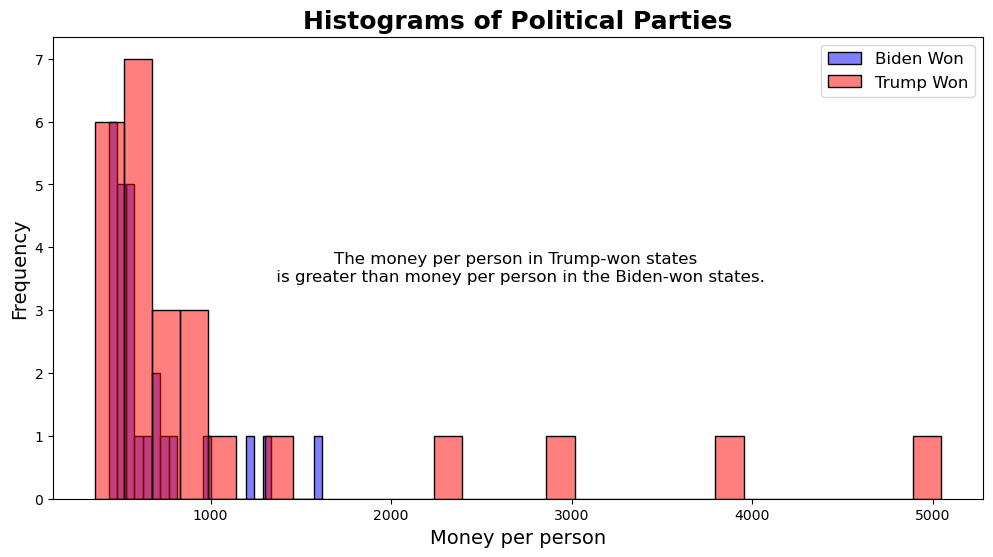

In [102]:
plt.figure(figsize=(12, 6))
sns.histplot(data=Biden_won['price/citizen'], color='blue', bins=25, alpha=0.5, common_norm=False, label='Biden Won')
sns.histplot(data=Trump_won['price/citizen'], color='red', bins=30, alpha=0.5, common_norm=False, label='Trump Won')

plt.title("Histograms of Political Parties", fontsize=18, fontweight='bold')
plt.xlabel('Money per person', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize='large')

plt.text(0.5, 0.5, "The money per person in Trump-won states \n is greater than money per person in the Biden-won states.",
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)


plt.show()



# Conclusion

Revisiting the questions that were posed:

# Is the allocation equitable based on the population of each of the States and Territories, or is bias apparent?

No, it is not equitable based on the population of the United States. When examining the funding per state, it is evident that Alaska, with a relatively small population, ranks as the number 1 state, while populous states like California and New York are near the bottom of the list. There is no apparent bias.

# Does the allocation favor the political interests of the Biden administration?

No, it does not favor the political interests of the Biden Administration. Although it may appear biased when looking at the graphs, the numbers do not support the presence of bias in the Biden Administration's allocation.
